In [1]:
from PIL import Image as img
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import os
import math

%matplotlib inline
plt.style.use ('dark_background')
maks_intezitet = 255


In [2]:
def napravi_Histogram (hist_niz, ime_slike, ime_funkcije):
    
    plt.clf()
    plt.xlabel ('Vrednosti inteziteta')
    plt.ylabel ('Broj pojavljivanja')
    plt.bar (range (len(hist_niz)), hist_niz)
    plt.savefig (os.path.join ('Rezultati', 'Histogram', ime_slike) + '_' + ime_funkcije + '.jpg')


In [3]:
def izracunaj_koef (slika_niz):
    
    br_piksela = slika_niz.size
    # Nalazenje raspodele piksela po intezitetima
    hist, _ = np.histogram (slika_niz, bins = maks_intezitet, range = (0, maks_intezitet))
    
    izmenjeni = np.zeros (maks_intezitet + 1)
    
    # Primena funkcije promene
    # Racuna se kumulativna suma histograma, ona oznacava ukupan broj piksela koji ima vrednost inteziteta <= od i-te vrednosti
    # A onda se ta suma normalizuje i stavlja kao nova vrednost
    for i in range (len(izmenjeni)):
        izmenjeni[i] = (maks_intezitet / br_piksela) * hist[: i+1].sum()
    
    izmenjeni = np.floor (izmenjeni)
    
    return izmenjeni


In [4]:
def Globalna (putanja_slike, ime_slike):
    
    slika = img.open (os.path.join(putanja_slike, ime_slike + '.jpg')).convert ('L')
    slika_niz = np.uint8 (np.array (slika))
    
    rez_niz = np.zeros (slika_niz.shape, np.uint8)
    
    hist, _ = np.histogram (slika_niz, bins = maks_intezitet, range = (0, maks_intezitet))
    napravi_Histogram (hist, ime_slike, 'Globalna_1')
    
    tmp_niz = izracunaj_koef (slika_niz)
    #napravi_Histogram (tmp_niz, ime_slike, 'KoefGlobalna')
    
    for (x, y), vrednost in np.ndenumerate (slika_niz):
        rez_niz [x, y] = tmp_niz[vrednost]
    
    hist, _ = np.histogram (rez_niz, bins = maks_intezitet + 1, range = (0, maks_intezitet))
    napravi_Histogram (hist, ime_slike, 'Globalna_2')
    
    rez = img.fromarray (rez_niz)
    rez.save (os.path.join ('Rezultati', 'Histogram', ime_slike + '_Globalna_0.jpg'))


In [5]:
def poredjenje ():
    
    dir_putanja_rez = os.path.join ('Rezultati', 'Histogram')
    dir_putanja_ulaz = os.path.join ('Slike', 'Histogram slike')
    lista_imena_rez = sorted(os.listdir (dir_putanja_rez))
    
    lista_imena_ulaz = sorted(os.listdir (dir_putanja_ulaz))
    broj_slika = len (lista_imena_ulaz)
    i = 0  # Brojac originala
    j = 0  # Brojac rezultata
    k = 0  # Globalni brojac
    
    plt.clf()
    fig, ax = plt.subplots (broj_slika, 4, figsize = (35, 50))
    
    for ax_i in ax:
        
        for ax_j in ax_i:
            
            # Iscrtavanje originala
            if (k % 4 == 0):
                putanja_slike = os.path.join (dir_putanja_ulaz, lista_imena_ulaz[i])
                ax_j.set_title (str.split(lista_imena_ulaz[i], '.')[0])
                i += 1
            
            else:
                putanja_slike = os.path.join (dir_putanja_rez, lista_imena_rez[j])
                ax_j.set_title (str.split(lista_imena_rez[j], '.')[0])
                j += 1
            
            slika = mpimg.imread (putanja_slike)
            
            ax_j.imshow (slika, cmap = 'gray')
            ax_j.axis ('off')
            k += 1
    
    plt.savefig (os.path.join ('Rezultati', 'sve_histogram.png'))
    plt.show()
    

<Figure size 432x288 with 0 Axes>

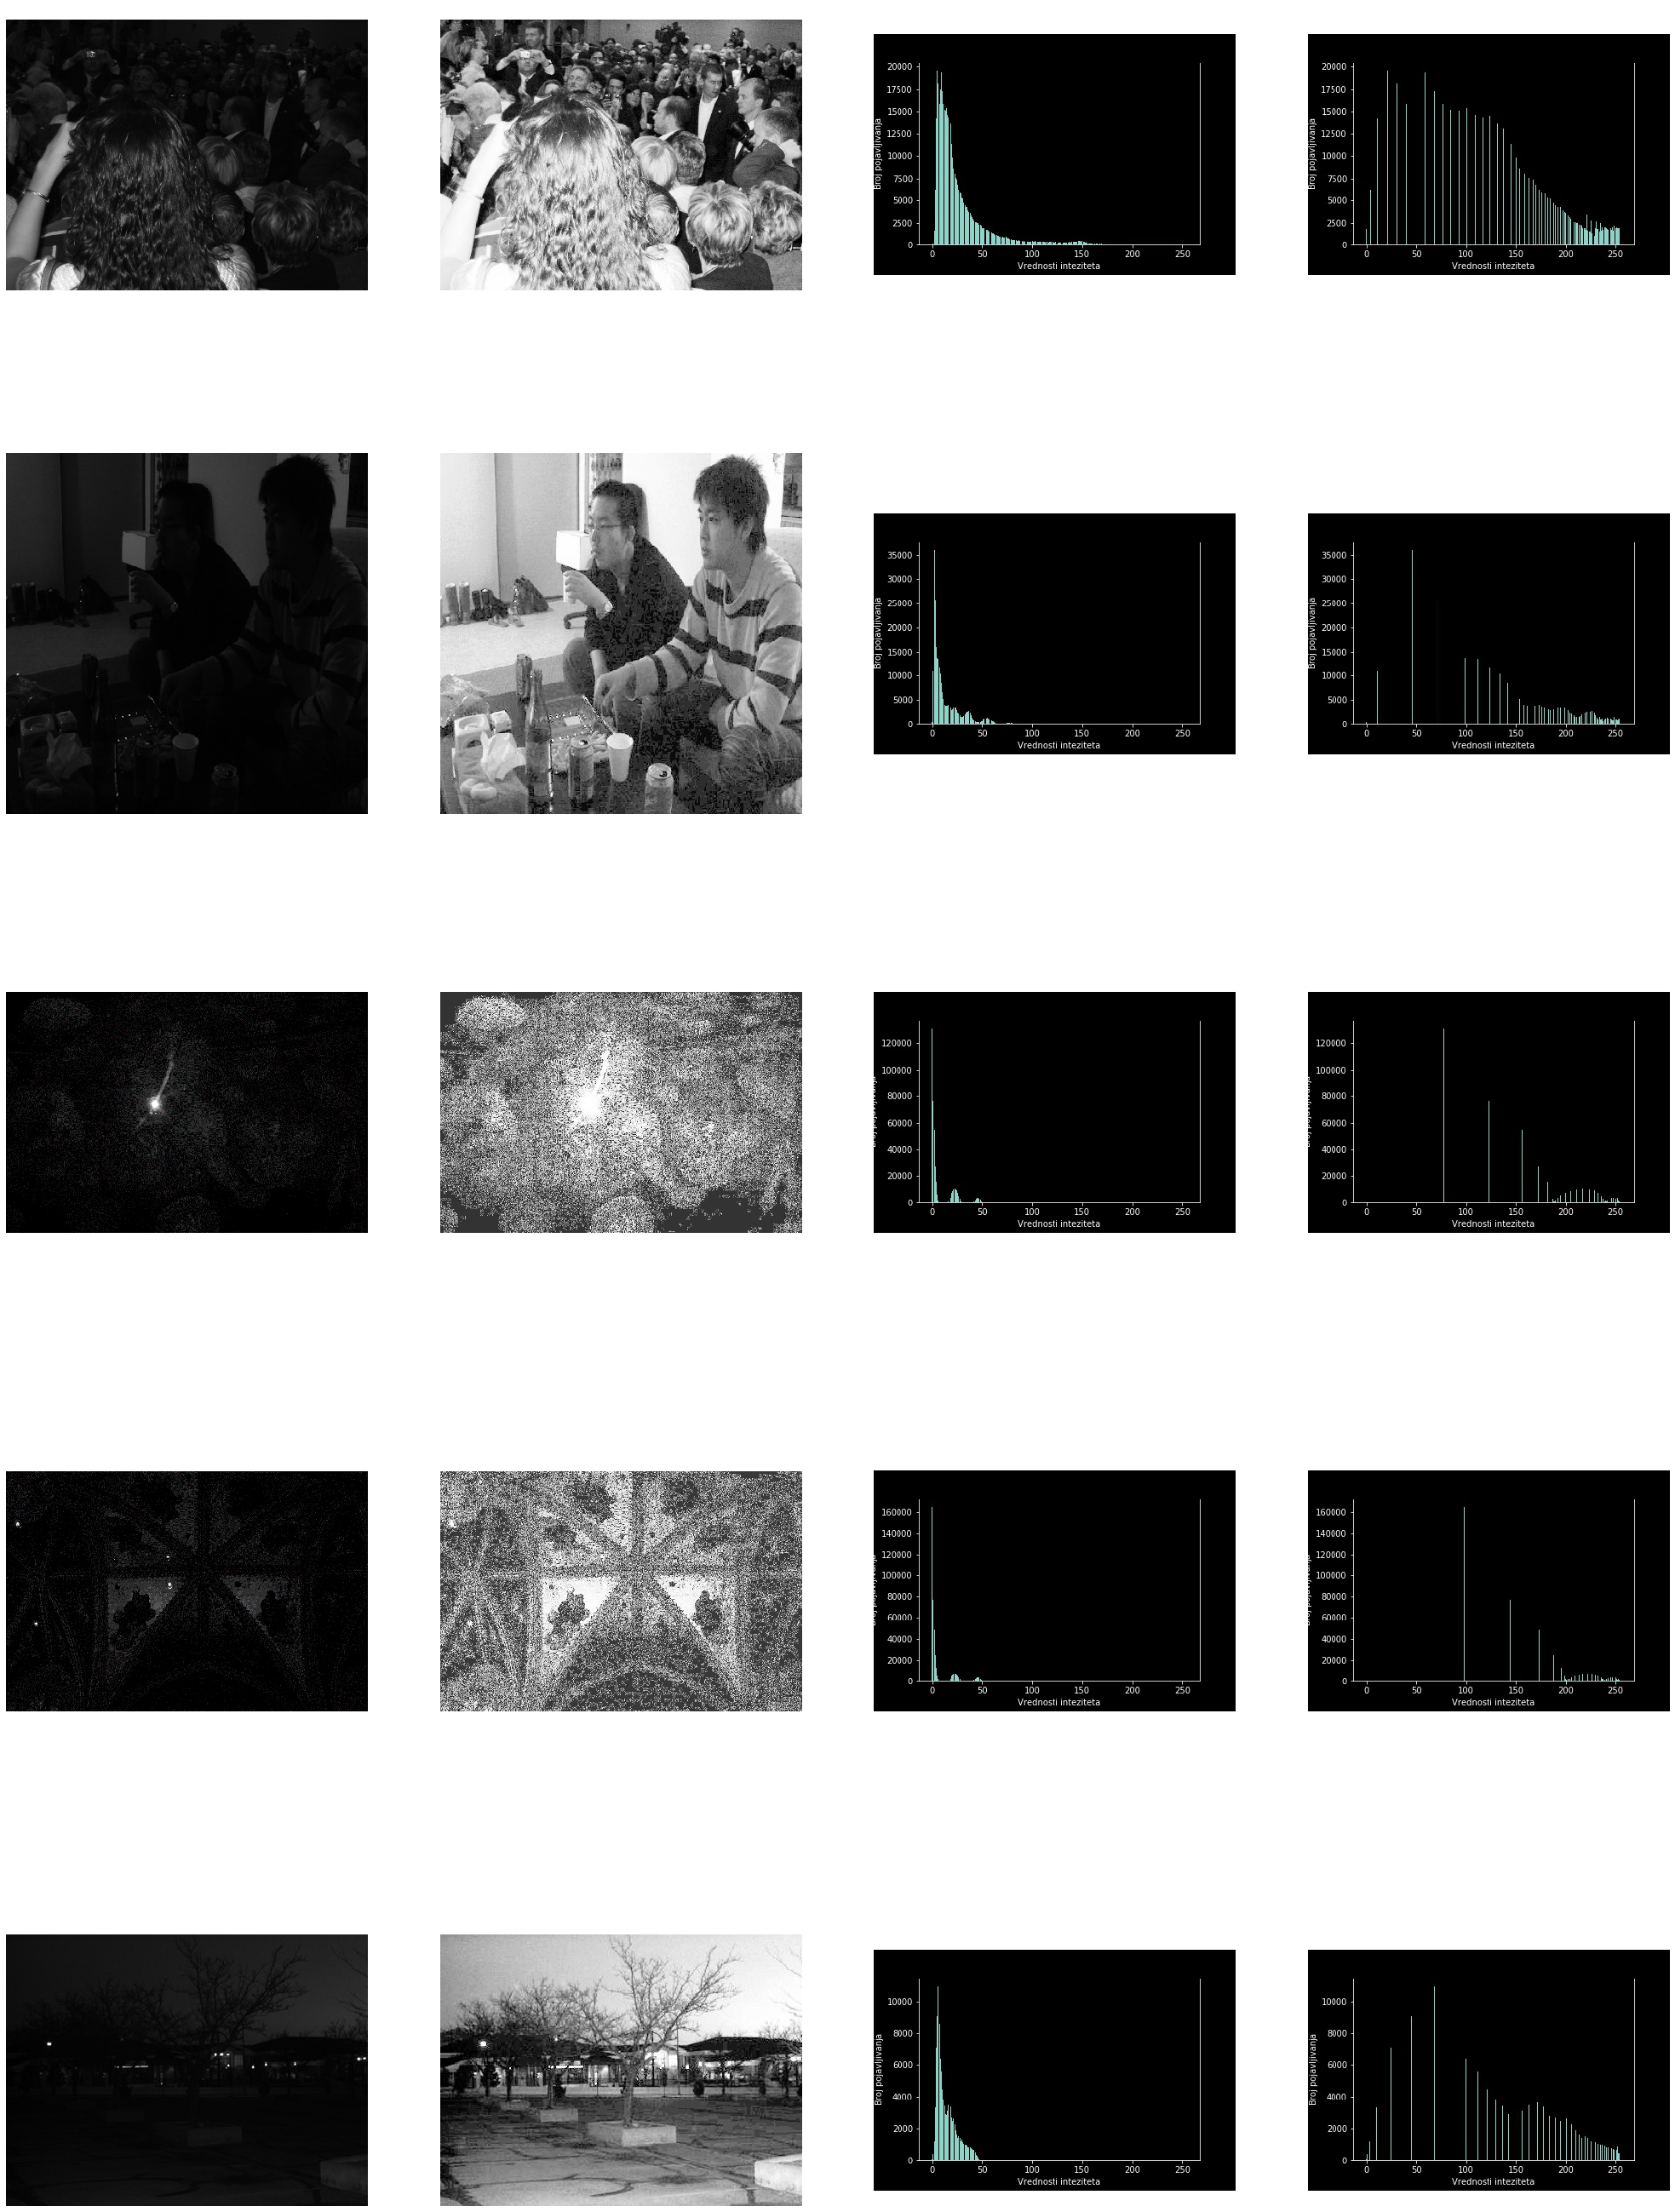

In [6]:
def main():
    
    dir_putanja = os.path.join ('Slike', 'Histogram slike')
    
    for ime_slike in os.listdir(dir_putanja):
        if os.path.splitext(ime_slike)[-1] == '.jpg':
            Globalna (dir_putanja, os.path.splitext (ime_slike)[-2])
    
    poredjenje()

if __name__ == '__main__':
    main()